# Step 1: Import Libraries

In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Step 2: Read, Understand and Pre-process Train/Test Data

# Step 2.1: Read Data

In [2]:
data = pd.read_csv('diabetes.csv') 

In [3]:
data.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Diabetes_012
0,1,1,1,25,1,0,0,1,0,1,0,1,0,3,0,0,1,0,11,0
1,1,1,1,30,1,0,1,0,1,1,0,1,0,5,30,30,1,0,9,2
2,0,0,1,24,0,0,0,0,0,1,0,1,0,2,0,0,0,1,8,0
3,0,0,1,25,1,0,0,1,1,1,0,1,0,3,0,0,0,1,13,2
4,1,1,1,34,1,0,0,0,1,1,0,1,0,3,0,30,1,0,10,0
5,0,0,1,26,1,0,0,0,0,1,0,1,0,3,0,15,0,0,7,0
6,1,1,1,28,0,0,0,0,0,1,0,1,0,4,0,0,1,0,11,2
7,0,1,1,33,1,1,0,1,0,1,0,1,1,4,30,28,0,0,4,0
8,1,0,1,33,0,0,0,1,0,0,0,1,0,2,5,0,0,0,6,0
9,1,1,1,21,0,0,0,1,1,1,0,1,0,3,0,0,0,0,10,0


In [4]:
data.dtypes

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Diabetes_012            int64
dtype: object

# Step 2.2: Understand Data

In [5]:
data.columns.name="index"
print("Train Dataset:")
print(data)

Train Dataset:
index   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0            1         1          1   25       1       0   
1            1         1          1   30       1       0   
2            0         0          1   24       0       0   
3            0         0          1   25       1       0   
4            1         1          1   34       1       0   
...        ...       ...        ...  ...     ...     ...   
240645       1         1          1   45       0       0   
240646       1         1          1   18       0       0   
240647       0         0          1   28       0       0   
240648       1         0          1   23       0       0   
240649       1         1          1   25       0       0   

index   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
0                          0             1       0        1   
1                          1             0       1        1   
2                          0             0       0        1   
3           

In [6]:
print("Train Data Set Columns:")
trainDatadf=pd.DataFrame(data)
trainDataIndex=trainDatadf.columns
print(trainDataIndex)

print("\n")
print("Number of instances in Train Dataset")
print("Train Instances: %s"% (len(trainDatadf.index)))

Train Data Set Columns:
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Diabetes_012'],
      dtype='object', name='index')


Number of instances in Train Dataset
Train Instances: 240650


In [7]:
trainDataIndex

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Diabetes_012'],
      dtype='object', name='index')

In [8]:
trainDatadf

index,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Diabetes_012
0,1,1,1,25,1,0,0,1,0,1,0,1,0,3,0,0,1,0,11,0
1,1,1,1,30,1,0,1,0,1,1,0,1,0,5,30,30,1,0,9,2
2,0,0,1,24,0,0,0,0,0,1,0,1,0,2,0,0,0,1,8,0
3,0,0,1,25,1,0,0,1,1,1,0,1,0,3,0,0,0,1,13,2
4,1,1,1,34,1,0,0,0,1,1,0,1,0,3,0,30,1,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240645,1,1,1,45,0,0,0,0,1,1,0,1,0,3,0,5,0,1,5,0
240646,1,1,1,18,0,0,0,0,0,0,0,1,0,4,0,0,1,0,11,2
240647,0,0,1,28,0,0,0,1,1,0,0,1,0,1,0,0,0,0,2,0
240648,1,0,1,23,0,0,0,0,1,1,0,1,0,3,0,0,0,1,7,0


In [9]:
data.describe()

index,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Diabetes_012
count,240650.000000,240650.000000,240650.000000,240650.000000,240650.000000,240650.000000,240650.000000,240650.000000,240650.000000,240650.000000,240650.000000,240650.000000,240650.000000,240650.000000,240650.000000,240650.000000,240650.000000,240650.000000,240650.000000,240650.000000
mean,0.430580,0.425439,0.962768,28.405710,0.444721,0.040573,0.094635,0.755587,0.633937,0.810538,0.056235,0.951585,0.083661,2.510746,3.170048,4.232425,0.168170,0.439680,8.051926,0.297623
std,0.495158,0.494410,0.189331,6.629625,0.496936,0.197300,0.292711,0.429740,0.481728,0.391876,0.230376,0.214641,0.276879,1.066631,7.401407,8.713573,0.374018,0.496349,3.042948,0.699068
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,2.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240650 entries, 0 to 240649
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                240650 non-null  int64
 1   HighChol              240650 non-null  int64
 2   CholCheck             240650 non-null  int64
 3   BMI                   240650 non-null  int64
 4   Smoker                240650 non-null  int64
 5   Stroke                240650 non-null  int64
 6   HeartDiseaseorAttack  240650 non-null  int64
 7   PhysActivity          240650 non-null  int64
 8   Fruits                240650 non-null  int64
 9   Veggies               240650 non-null  int64
 10  HvyAlcoholConsump     240650 non-null  int64
 11  AnyHealthcare         240650 non-null  int64
 12  NoDocbcCost           240650 non-null  int64
 13  GenHlth               240650 non-null  int64
 14  MentHlth              240650 non-null  int64
 15  PhysHlth              240650 non-n

In [11]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
240645    False
240646    False
240647    False
240648    False
240649    False
Length: 240650, dtype: bool

In [12]:
q=data.drop_duplicates()

<AxesSubplot:>

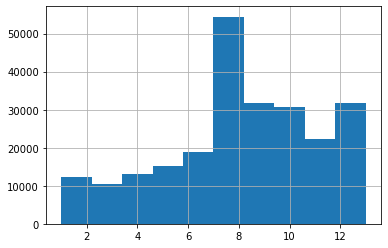

In [13]:
data.Age.hist()

<AxesSubplot:ylabel='Smoker'>

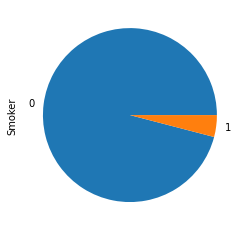

In [14]:
data.groupby('Stroke').Smoker.count().plot(kind='pie')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HighBP', ylabel='count'>

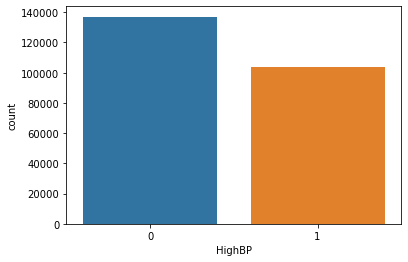

In [15]:
sns.countplot(data.HighBP)

<AxesSubplot:ylabel='Frequency'>

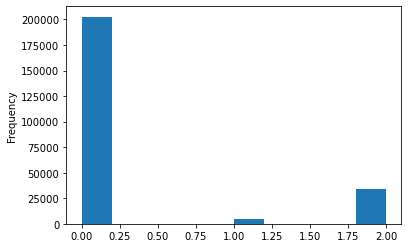

In [16]:
data.Diabetes_012.plot(kind='hist' , grid = False)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


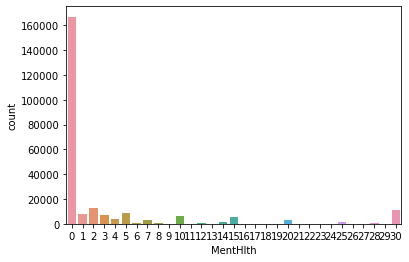

In [17]:
sns.countplot(data.MentHlth)
plt.show()

<AxesSubplot:ylabel='Smoker'>

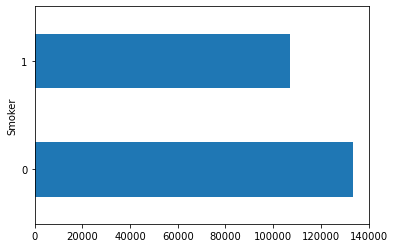

In [18]:
data.groupby('Smoker').Stroke.count().plot(kind='barh')

<AxesSubplot:xlabel='index', ylabel='index'>

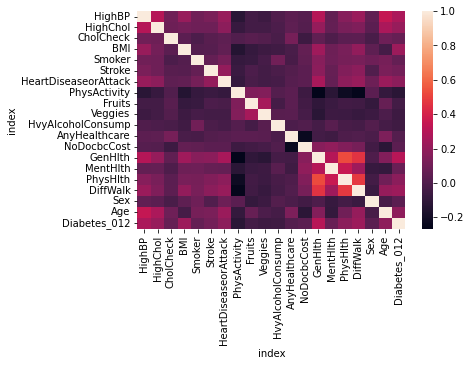

In [19]:
sns.heatmap(data.corr(),annot=False)

<AxesSubplot:xlabel='Age'>

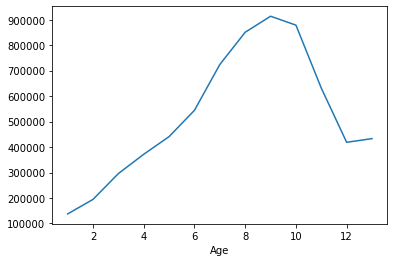

In [20]:
data.groupby('Age').BMI.sum().plot(kind='line')

<AxesSubplot:xlabel='Age'>

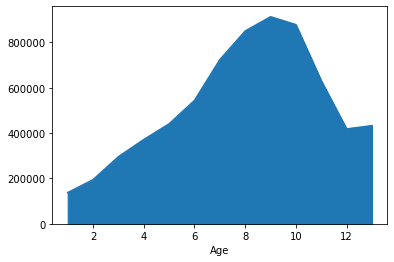

In [21]:
data.groupby('Age').BMI.sum().plot(kind='area')

<AxesSubplot:xlabel='BMI', ylabel='Age'>

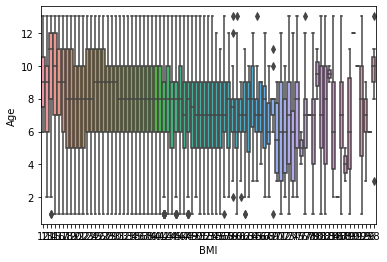

In [22]:
sns.boxplot(x='BMI',y='Age',data=data)

# pre-processsed data


In [23]:
preprocessed_dataset = data.fillna('0')

print("Train dataset before pre-processing:")
print("=========================================\n")
print(data)

print("\n\n\nTrain dataset after pre-processing:")
print("=========================================\n")
print(preprocessed_dataset)

Train dataset before pre-processing:

index   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0            1         1          1   25       1       0   
1            1         1          1   30       1       0   
2            0         0          1   24       0       0   
3            0         0          1   25       1       0   
4            1         1          1   34       1       0   
...        ...       ...        ...  ...     ...     ...   
240645       1         1          1   45       0       0   
240646       1         1          1   18       0       0   
240647       0         0          1   28       0       0   
240648       1         0          1   23       0       0   
240649       1         1          1   25       0       0   

index   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
0                          0             1       0        1   
1                          1             0       1        1   
2                          0             0       0  

In [24]:
preprocessed_dataset.head()

index,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Diabetes_012
0,1,1,1,25,1,0,0,1,0,1,0,1,0,3,0,0,1,0,11,0
1,1,1,1,30,1,0,1,0,1,1,0,1,0,5,30,30,1,0,9,2
2,0,0,1,24,0,0,0,0,0,1,0,1,0,2,0,0,0,1,8,0
3,0,0,1,25,1,0,0,1,1,1,0,1,0,3,0,0,0,1,13,2
4,1,1,1,34,1,0,0,0,1,1,0,1,0,3,0,30,1,0,10,0


# no need for Label Encoding for Train/Test Data

# Train ML Algorithms using Data

In [5]:
x=preprocessed_dataset.iloc[:, :-1].values
y=preprocessed_dataset.iloc[:, -1:].values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Train ML Algorithms using Logistic Regression

In [7]:
logisticRegression=LogisticRegression()
logisticRegression.fit(x_train,y_train)
LR = logisticRegression.predict(x_test)
accuracy_score(y_test, LR) # Evaluate ML Algorithms using Test Data

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.843881155204654

In [8]:
# recall_score=recall_score(y_test, LR,average='micro')
# print("\n recall_score is: %s"%recall_score)
# #precision_score=precision_score(y_test, LR)
# print("\n precision_score is: %s"%precision_score)
# f1_score=f1_score(y_test, LR)
# print("\n f1_score is: %s"%f1_score)

# Train ML Algorithms using Random Forest Classifier

In [9]:
randomForest=RandomForestClassifier()
randomForest.fit(x_train,y_train)
RF = randomForest.predict(x_test)
accuracy_score(y_test, RF)## Evaluate ML Algorithms using Test Data
# recall_score=recall_score(y_test, RF,average='micro')
# print("\n recall_score is: %s"%recall_score)
# precision_score=precision_score(y_test, RF)
# print("\n precision_score is: %s"%precision_score)
# f1_score=f1_score(y_test, RF)
# print("\n f1_score is: %s"%f1_score)

C:\Users\DELL\AppData\Local\Temp/ipykernel_7512/2057489157.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(x_train,y_train)


0.8346145854976106

# Train ML Algorithms using linearSvc

In [10]:
linearSvc=LinearSVC()
linearSvc.fit(x_train,y_train)
LS = linearSvc.predict(x_test)
accuracy_score(y_test, LS) ## Evaluate ML Algorithms using Test Data

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8447537918138375

# Train ML Algorithms using BernoulliNB


In [11]:
bernoulliNB=BernoulliNB()
bernoulliNB.fit(x_train,y_train)
NB = bernoulliNB.predict(x_test)
accuracy_score(y_test, NB) ## Evaluate ML Algorithms using Test Data

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8191564512777894

# Save the Trained Model as Pickle File

In [ ]:
filename='diabetes-mmodel.sav'
pickle.dump(randomForest,open(filename,'wb'))

# Load the Trained Model


In [ ]:
loadBM=pickle.load(open(filename,'rb'))

In [ ]:
print(loadBM)

# Take Input from User

In [ ]:
HighBP=input("0 = no high BP 1 = high BP")
HighChol=input("0 = no high cholesterol 1 = high cholesterol")
CholCheck=input("0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years")
BMI=input("Please enter your Body Mass Index(20-50):")
Smoker=input("Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes:")
Stroke=input("(Ever told) you had a stroke. 0 = no 1 = yes")
HeartDiseaseorAttack=input("coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes:")
PhysActivity=input("physical activity in past 30 days - not including job 0 = no 1 = yes")
Fruits=input("Consume Fruit 1 or more times per day 0 = no 1 = yes")
Veggies=input("Consume Vegetables 1 or more times per day 0 = no 1 = yes:")
HvyAlcoholConsump=input("Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes")
AnyHealthcare=input("Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes:")
NoDocbcCost=input("Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes:")
GenHlth=input("Would you say that in general your health is: scale (1-5) 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor:")
MentHlth=input("Now thinking about your mental health, which includes stress,depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days:")
PhysHlth=input("Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days:")
DiffWalk=input("Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes:")
Sex=input("0 = female 1 = male:")
Age=input("13-level age category (_AGEG5YR see codebook) 1 = (18-24), 9=(60-64), 13=(80 or older)")
Education=input("Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)")
Income=input("Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more")

In [ ]:
print("user input \n")
newdf=pd.DataFrame({"HighBP":HighBP,"HighChol":HighChol,"CholCheck":CholCheck,"BMI":BMI,"Smoker":Smoker,"Stroke":Stroke,"HeartDiseaseorAttack":HeartDiseaseorAttack,"PhysActivity":PhysActivity,"Fruits":Fruits,"Veggies":Veggies,"HvyAlcoholConsump":HvyAlcoholConsump,"AnyHealthcare":AnyHealthcare,"NoDocbcCost":NoDocbcCost,"GenHlth":GenHlth,"MentHlth":MentHlth,"PhysHlth":PhysHlth,"DiffWalk":DiffWalk,"Sex":Sex,"Age":Age,"Education":Education,"Income":Income},index=[0])
print(newdf)

# Apply Trained Model on Feature Vector of Unseen Data and Output Prediction to User

In [ ]:
outputPredictionBM= loadBM.predict(newdf)

if outputPredictionBM==0:
    Diabetes_012= "Patient has no diabetes"
    
elif outputPredictionBM==1:
    Diabetes_012="Patient has Prediabetes"

elif outputPredictionBM==2:
    Diabetes_012="Patient has Diabetes"

print("\n Prediction: %s"%Diabetes_012)